In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data_df = pd.read_excel('Industry_Portfolios_sample.xlsx')
data_df2 = data_df.drop(['Date'],axis=1).copy()

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
##input rf_rate

rf_rate = 0.13
data_df

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [3]:
mean_returns = data_df2.mean()
cov_matrix = data_df2.cov()

cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


In [4]:
data_table = pd.DataFrame(data_df2.mean(),columns = ['mean'])
data_table['std']=data_df2.std()

data_table

,mean,std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


In [5]:
R = np.array(data_table['mean'])

Inverse_cov_matrix = np.linalg.inv(cov_matrix)

E_unit_vector = np.array([1]*10)

In [6]:
alpha = np.dot(np.dot(R,Inverse_cov_matrix),E_unit_vector)

alpha

0.137943238699319

In [7]:
zeta = np.dot(np.dot(R,Inverse_cov_matrix),R)

zeta

0.19640858464482278

In [8]:
delta = np.dot(np.dot(E_unit_vector.T,Inverse_cov_matrix),E_unit_vector)

delta

0.1373875973567117

In [9]:
Return_MV_port = alpha/delta
Return_MV_port

1.0040443340832625

In [10]:
Return_Portfolio_Target_List = pd.Series(np.arange(0,2.1,0.1))

In [11]:
def Variance_P_formula(alpha,delta,zeta,Return_P,Return_MV_port):
    return (1/delta + delta/(zeta*delta-alpha**2)*(Return_P - Return_MV_port)**2)

Variance_P_List = Return_Portfolio_Target_List.apply(lambda x: Variance_P_formula(alpha,delta,zeta,x,Return_MV_port))
SD_P_List = np.sqrt(Variance_P_List)

Text(0.5, 1.0, 'Minimum-Variance Frontier')

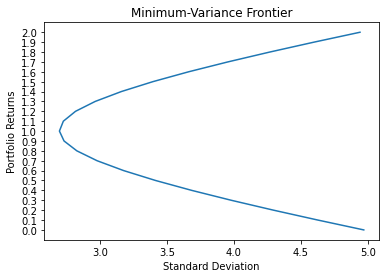

In [12]:
plt.yticks(Return_Portfolio_Target_List)
plt.plot(SD_P_List,Return_Portfolio_Target_List)
plt.xlabel("Standard Deviation")
plt.ylabel("Portfolio Returns")
plt.title('Minimum-Variance Frontier')

In [13]:
SD_P_List.head()

0    4.968659
1    4.625204
2    4.294511
3    3.979763
4    3.685049
dtype: float64

In [14]:
def Variance_P_formula_riskless_asset(alpha,delta,zeta,Return_P,Return_F):
    return (Return_P-Return_F)**2/(zeta-2*alpha*Return_F+delta*Return_F**2)

Variance_CAL_line = Variance_P_formula_riskless_asset(alpha,delta,zeta,2,0.13)
SD_CAL_line = np.sqrt(Variance_CAL_line)
SD_CAL_line

4.633695248093936

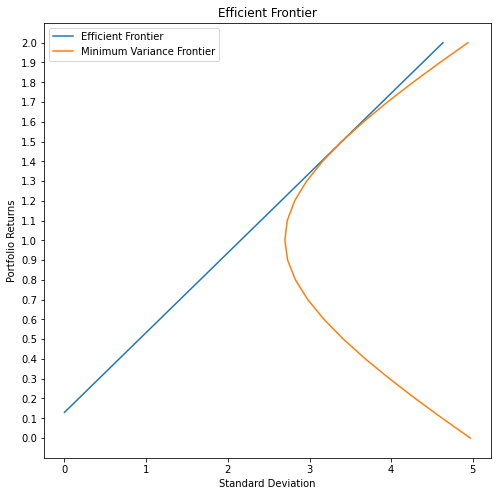

In [15]:
figure(figsize=(8, 8))

plt.yticks(Return_Portfolio_Target_List)
x = [0,SD_CAL_line]
y = [0.13,2]
plt.plot(x,y, label = 'Efficient Frontier')

plt.plot(SD_P_List,Return_Portfolio_Target_List, label='Minimum Variance Frontier')

plt.xlabel("Standard Deviation")
plt.ylabel("Portfolio Returns")
plt.title('Efficient Frontier')
plt.legend()

In [16]:
def sharpe_ratio(alpha,delta,zeta,Return_F):
    return np.sqrt((zeta-2*alpha*Return_F+delta*Return_F**2))

sharpe_ratio = sharpe_ratio(alpha,delta,zeta,0.13)
sharpe_ratio

0.4035655993495088

In [17]:
(2-0.13)/SD_CAL_line

0.4035655993495088

In [18]:
def mean_return_tanj_port(alpha,delta,zeta,Return_F):
    return (alpha*Return_F-zeta)/(delta*Return_F-alpha)

mean_return_tanj_point = mean_return_tanj_port(alpha,delta,zeta,0.13)
mean_return_tanj_point

1.4862735358446901

In [19]:
def lambda_risk_free(alpha,delta,zeta,Return_P,Return_F):
    return (Return_P-Return_F)/(zeta-2*alpha*Return_F+delta*Return_F**2)

lambda_RF = lambda_risk_free(alpha,delta,zeta,mean_return_tanj_point,0.13)

def ideal_port_wstar_risk_free(lambda_RF,Inverse_cov_matrix,R,Return_F,E_unit_vector):
    wstar_risk_free = np.dot(np.dot(lambda_RF,Inverse_cov_matrix),(R- np.dot(Return_F,E_unit_vector)))
    return wstar_risk_free

ideal_port_wstar_risk_free_1 = ideal_port_wstar_risk_free(lambda_RF,Inverse_cov_matrix,R,0.13,E_unit_vector)

In [20]:
ideal_port_df = pd.DataFrame({'Ideal portfolio weights':ideal_port_wstar_risk_free_1})
ideal_port_df.set_index(data_df2.columns,inplace=True)
ideal_port_df

,Ideal portfolio weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


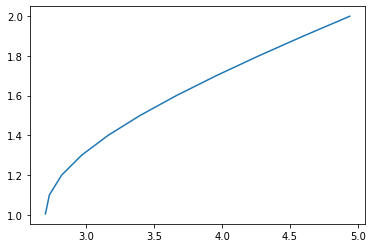

In [21]:
Efficient_Frontier_Return_P_List = np.arange(1,2.1,0.1)

Efficient_Frontier_Return_P_List[0] = Return_MV_port

efficient_func = np.vectorize(Variance_P_formula)
Efficient_Variance_P_List = efficient_func(alpha,delta,zeta,Efficient_Frontier_Return_P_List,Return_MV_port)
SD_Efficient_P_List = np.sqrt(Efficient_Variance_P_List)

plt.plot(SD_Efficient_P_List,Efficient_Frontier_Return_P_List)

In [22]:
def portfolio_performance(weights,mean_returns,covariance_matrix,trading_days):
    returns = np.sum(mean_returns*weights*trading_days)
    std = np.sqrt(   np.dot(weights,   np.dot(cov_matrix,weights))   )*np.sqrt(trading_days)
    return returns, std

weights = np.array([1/len(data_df2.columns)]*10)
trading_days= 120                                                                      

returns, std = portfolio_performance(weights,mean_returns,cov_matrix,trading_days)

returns, std

(103.49100000000003, 46.586966388707054)

In [23]:
a_1 = (np.dot(zeta*Inverse_cov_matrix,E_unit_vector) - np.dot(alpha*Inverse_cov_matrix,R))/(zeta*delta - alpha**2)

b_1 = (np.dot(delta*Inverse_cov_matrix,R) - np.dot(alpha*Inverse_cov_matrix,E_unit_vector))/(zeta*delta - alpha**2)

sum(a_1+ b_1*ideal_port_wstar_risk_free_1)

4.73851209352206

In [24]:
R_weighted_tanj_portfolio = np.dot(ideal_port_wstar_risk_free_1,data_table['mean'])
R_weighted_tanj_portfolio

Var_weighted_tanj_portfolio = np.dot( np.dot(ideal_port_wstar_risk_free_1,cov_matrix) ,ideal_port_wstar_risk_free_1)
Var_weighted_tanj_portfolio

11.294481468962049

In [25]:
def ideal_port_wstar(alpha,delta,zeta,Inverse_cov_matrix,R,E_unit_vector,target_return):
    weight_1 = np.dot((delta*0.1-alpha)/(zeta*delta-alpha**2)*Inverse_cov_matrix,R)
    weight_2 = np.dot(np.dot((zeta-alpha*0.1)/(zeta*delta-alpha**2),Inverse_cov_matrix),E_unit_vector)
    ideal_port= weight_1+weight_2
    return ideal_port

ideal_port1 = ideal_port_wstar(alpha,delta,zeta,Inverse_cov_matrix,R,E_unit_vector,0.1)

In [26]:
ideal_port_df = pd.DataFrame({'Ideal portfolio weights':ideal_port1})
ideal_port_df.set_index(data_df2.columns,inplace=True)
ideal_port_df

,Ideal portfolio weights
NoDur,0.497726
Durbl,0.086385
Manuf,-1.773031
Enrgy,-0.004593
HiTec,0.469444
Telcm,-0.249949
Shops,-0.165055
Hlth,0.269184
Utils,0.657866
Other,1.212023
